<a href="https://colab.research.google.com/github/adilhussein1202/Titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

## importing the dataset

In [0]:
train_df = pd.read_csv('train_titanic.csv')
test_df = pd.read_csv('test_titanic.csv')

## handeling the missing data 

In [328]:
print('Training Data\n')
print(train_df.isnull().sum())
print('\n\n')
print('Test Data\n')
print(test_df.isnull().sum())

Training Data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



Test Data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Variable Description**

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

Survived: 0 = Did not survive 1 = Survived

In [329]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [330]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Taking care of Age column

In [331]:
train_df['Age'].isnull().sum()

177

In [332]:
## Percentage of missing values in age column
# df.shape[0] = give number of rows
# df.shape[1] = give the number of columns
print('Missing values in the age column : {:.2f} %'.format((train_df['Age'].isnull().sum())*100/train_df.shape[0]))

Missing values in the age column : 19.87 %


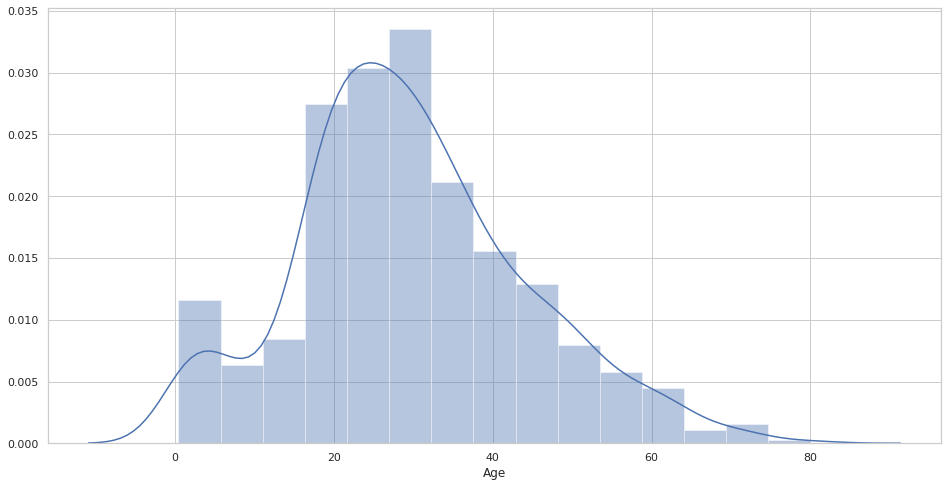

In [333]:
## Now looking at the age colums distribution

fig = plt.figure(figsize = (16, 8))
sns.distplot(train_df['Age'], bins = 15)
plt.xlabel('Age')
plt.show()

In the graph above we can clearly see that the values in the age column are skewed right. So we need to fill it with the median instead of mean


In [0]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

Text(0.5, 0, 'Age')

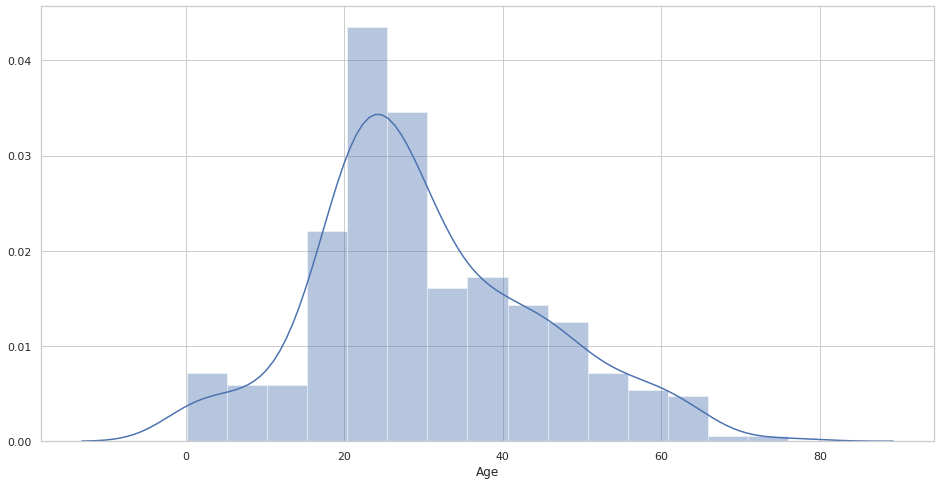

In [335]:
fig = plt.figure(figsize = (16, 8))
sns.distplot(test_df['Age'], bins = 15)
plt.xlabel('Age')

The same goes with the test dataset. Here also the age is skewed right.
We need to fill the missing cells with the median

In [0]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

Taking care of Embarked column

In [337]:
# Percentage of missing values in Embarked column

print('Percentage of missing values in cabin column {:.2f} %'.format((train_df['Embarked'].isnull().sum())*100/(train_df.shape[0])))

Percentage of missing values in cabin column 0.22 %


Text(0.5, 0, 'Embarked')

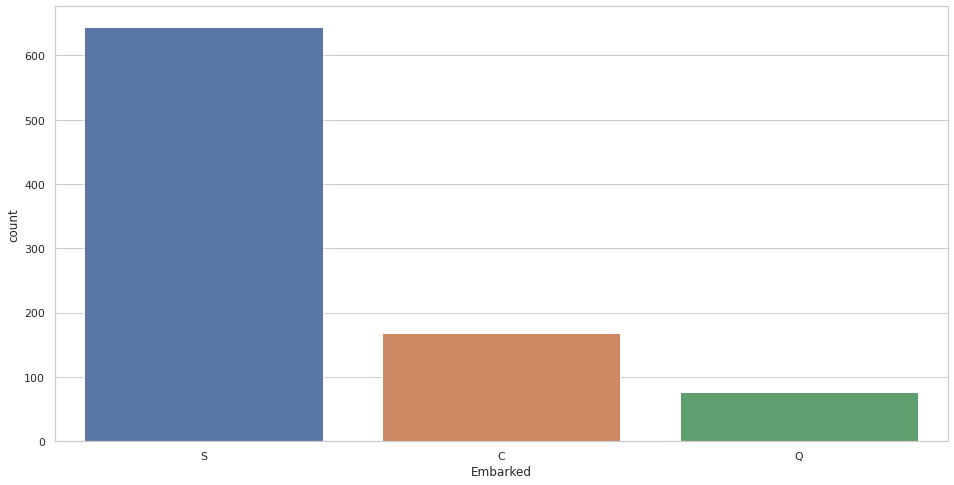

In [338]:
fig = plt.figure(figsize = (16, 8))
sns.countplot(train_df['Embarked'])
plt.xlabel('Embarked')

S occurs most of the time, so placing S in the place of missing values

In [0]:
train_df['Embarked'].fillna('S', inplace = True)

Taking care of Cabin column

In [340]:
print('Percentage of missing values in cabin column {:.2f} %'.format((train_df['Cabin'].isnull().sum())*100/(train_df.shape[0])))

Percentage of missing values in cabin column 77.10 %


Dropping the Cabin Column

In [0]:
train_df.drop('Cabin', axis = 1, inplace = True)
test_df.drop('Cabin', axis = 1, inplace = True)

Adding Additional Column

In [0]:
train_df['Travel_Alone'] = np.where((train_df['SibSp'] + train_df['Parch'] > 0), 0, 1)
train_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test_df['Travel_Alone'] = np.where((test_df['SibSp'] + test_df['Parch'] > 0), 0, 1)
test_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [343]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Travel_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [344]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Travel_Alone
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


Dropping those columns which are not needed in developing the model

In [0]:
train_df.drop(['Name', 'Ticket', 'Fare'], axis = 1, inplace = True)

In [346]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Travel_Alone
0,1,0,3,male,22.0,S,0
1,2,1,1,female,38.0,C,0
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,0
4,5,0,3,male,35.0,S,1


In [0]:
test_df.drop(['Name', 'Ticket', 'Fare'], axis = 1, inplace = True)

In [348]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Embarked,Travel_Alone
0,892,3,male,34.5,Q,1
1,893,3,female,47.0,S,0
2,894,2,male,62.0,Q,1
3,895,3,male,27.0,S,1
4,896,3,female,22.0,S,0


Checking the survival rate of male vs female

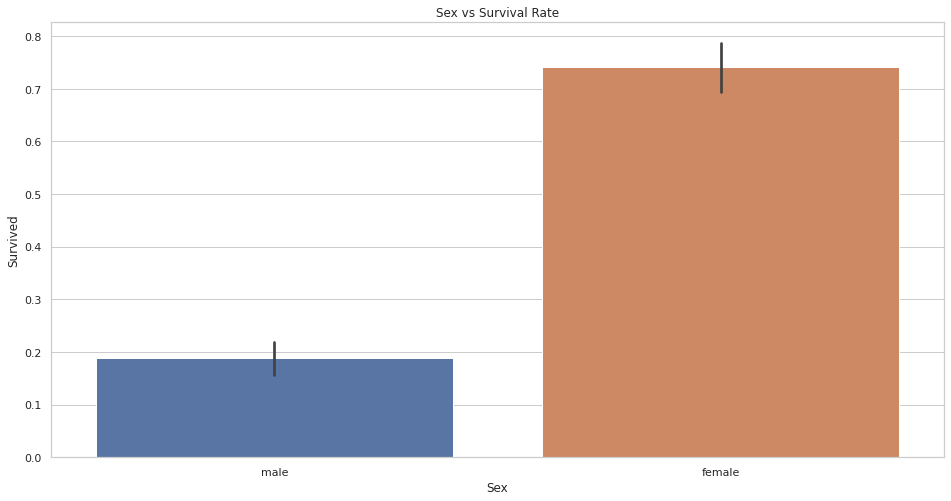

In [349]:
fig = plt.figure(figsize = (16, 8))
sns.barplot(x = 'Sex', y = 'Survived', data = train_df)
plt.title('Sex vs Survival Rate')
plt.show()

We can clearly observe that females are more likely to survive than males

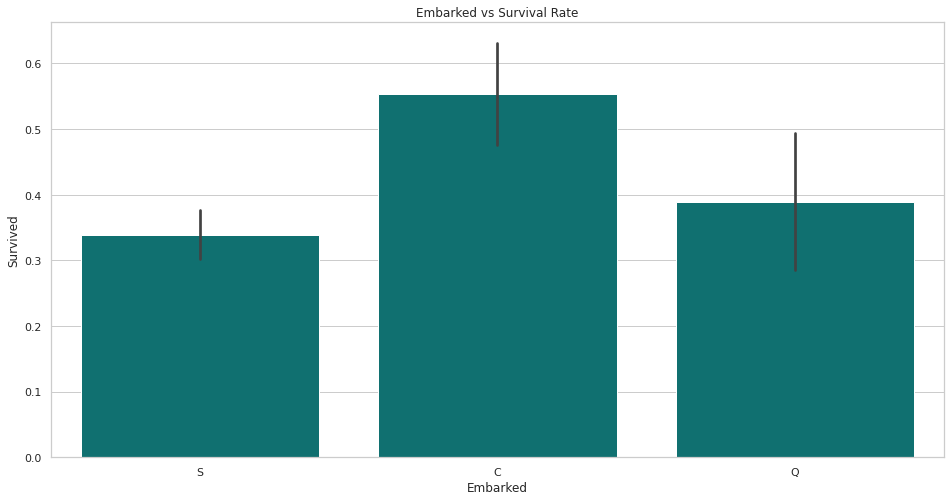

In [350]:
fig = plt.figure(figsize = (16, 8))
sns.barplot(x = 'Embarked', y = 'Survived', data=train_df, color="teal")
plt.title('Embarked vs Survival Rate')
plt.show()

People who boarded from Cherbourg, France seems to have survived the most, this may be related to Pclass

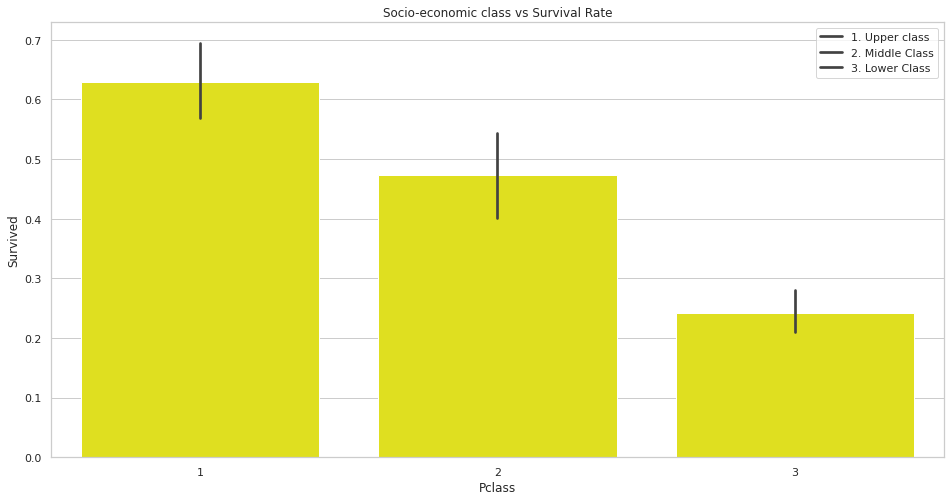

In [351]:
fig = plt.figure(figsize = (16, 8))
sns.barplot(x = 'Pclass', y = 'Survived', data=train_df, color="yellow")
plt.legend(['1. Upper class', 
            '2. Middle Class',
            '3. Lower Class'])
plt.title('Socio-economic class vs Survival Rate')
plt.show()

First class people who survived are more in number.

In [352]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Travel_Alone
0,1,0,3,male,22.0,S,0
1,2,1,1,female,38.0,C,0
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,0
4,5,0,3,male,35.0,S,1
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,S,1
887,888,1,1,female,19.0,S,1
888,889,0,3,female,28.0,S,0
889,890,1,1,male,26.0,C,1


In [0]:
training = pd.get_dummies(train_df, columns = ['Sex', 'Embarked', 'Pclass'])
training.drop('PassengerId', axis=1, inplace=True)
final_train = training

In [355]:
final_train.head()

,Survived,Age,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,0,1,0,0,1,0,0,1
1,1,38.0,0,1,0,1,0,0,1,0,0
2,1,26.0,1,1,0,0,0,1,0,0,1
3,1,35.0,0,1,0,0,0,1,1,0,0
4,0,35.0,1,0,1,0,0,1,0,0,1


In [356]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Embarked,Travel_Alone
0,892,3,male,34.5,Q,1
1,893,3,female,47.0,S,0
2,894,2,male,62.0,Q,1
3,895,3,male,27.0,S,1
4,896,3,female,22.0,S,0


In [0]:
testing = pd.get_dummies(test_df, columns = ['Sex', 'Embarked', 'Pclass'])
testing.drop('PassengerId', axis=1, inplace=True)
final_test = testing

In [358]:
final_test.head()

,Age,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,1,0,1,0,1,0,0,0,1
1,47.0,0,1,0,0,0,1,0,0,1
2,62.0,1,0,1,0,1,0,0,1,0
3,27.0,1,0,1,0,0,1,0,0,1
4,22.0,0,1,0,0,0,1,0,0,1


Text(0.5, 1.0, 'Density Plot of Age for Surviving Population and Deceased Population')

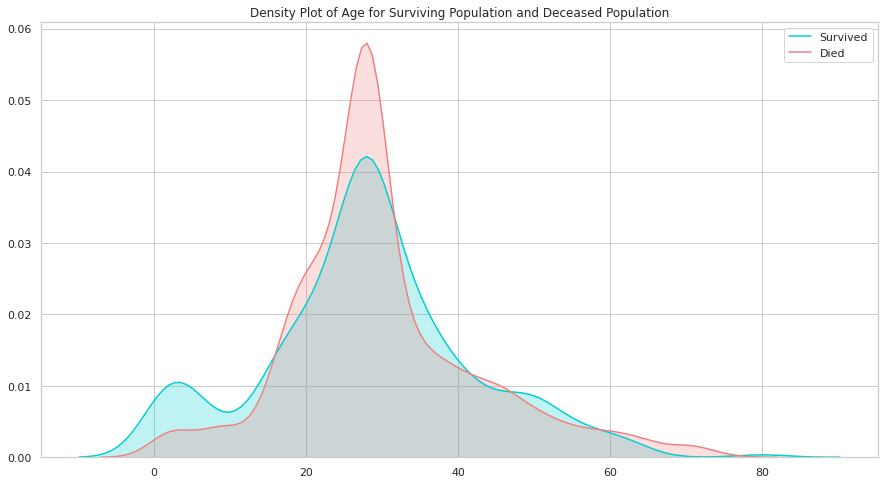

In [359]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')

Feature Selection (RFECV)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = training.drop('Survived', axis=1) # Independent varaibles
y = training['Survived'] # Dependent variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Logistic Regression
regressor = LogisticRegression(n_jobs=-1)

# Training (Finding the optimal weights)
regressor.fit(x_train, y_train)

# Predictions
y_pred = regressor.predict(x_test)

In [378]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n\n',cm,'\n\n')
print('The model is {:.2f} % accurate'.format(acc*100))

Confusion Matrix : 

 [[106  13]
 [ 19  41]] 


The model is 82.12 % accurate


In [0]:
predictions = regressor.predict(testing)

In [381]:
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
